In [2]:
#import required libraries
import pandas as pd 
import numpy as np
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
#Start spark session
spark = SparkSession.builder.appName("CarPricePrediction").getOrCreate()

23/08/25 08:27:28 WARN Utils: Your hostname, Imagines-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.254.189 instead (on interface en0)
23/08/25 08:27:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/25 08:27:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/25 08:27:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [5]:
# Using read.csv to read the dataset
df = spark.read.csv("/Users/nexus/Downloads/Car details v3.csv", inferSchema=True, header=True)

In [6]:
# Checks if there are any null values in the column
for col in df.columns:s
  print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

IndentationError: unexpected indent (3655476946.py, line 3)

In [ ]:
# Checks if there are any values with '?'
for col in df.columns:
  print(col, "\t", "with ? values: ", df.filter(df[col]=="?").count())

In [7]:
df.printSchema() # outputs the schema types which are automatically determined by spark

root
 |-- name: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- selling_price: integer (nullable = true)
 |-- km_driven: integer (nullable = true)
 |-- fuel: string (nullable = true)
 |-- seller_type: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- owner: string (nullable = true)
 |-- mileage: string (nullable = true)
 |-- engine: string (nullable = true)
 |-- max_power: string (nullable = true)
 |-- torque: string (nullable = true)
 |-- seats: integer (nullable = true)



In [8]:
df.show()

+--------------------+----+-------------+---------+------+-----------+------------+------------+----------+-------+----------+--------------------+-----+
|                name|year|selling_price|km_driven|  fuel|seller_type|transmission|       owner|   mileage| engine| max_power|              torque|seats|
+--------------------+----+-------------+---------+------+-----------+------------+------------+----------+-------+----------+--------------------+-----+
|Maruti Swift Dzir...|2014|       450000|   145500|Diesel| Individual|      Manual| First Owner| 23.4 kmpl|1248 CC|    74 bhp|      190Nm@ 2000rpm|    5|
|Skoda Rapid 1.5 T...|2014|       370000|   120000|Diesel| Individual|      Manual|Second Owner|21.14 kmpl|1498 CC|103.52 bhp| 250Nm@ 1500-2500rpm|    5|
|Honda City 2017-2...|2006|       158000|   140000|Petrol| Individual|      Manual| Third Owner| 17.7 kmpl|1497 CC|    78 bhp|12.7@ 2,700(kgm@ ...|    5|
|Hyundai i20 Sport...|2010|       225000|   127000|Diesel| Individual|      

In [9]:
# Checking the columns of the dataframe 
df.columns

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats']

In [10]:
# Checking the type of each column in the dataframe
df.describe()

DataFrame[summary: string, name: string, year: string, selling_price: string, km_driven: string, fuel: string, seller_type: string, transmission: string, owner: string, mileage: string, engine: string, max_power: string, torque: string, seats: string]

In [11]:
#create temporary view
df.createOrReplaceTempView("car")

In [12]:
# taking the cars whose selling price is less than 30000 and the transmission is Manual
result = spark.sql("SELECT * FROM car WHERE transmission = 'Manual' and selling_price < 30000")
result.show()

+-------------+----+-------------+---------+------+-----------+------------+-----------+---------+------+---------+-------------+-----+
|         name|year|selling_price|km_driven|  fuel|seller_type|transmission|      owner|  mileage|engine|max_power|       torque|seats|
+-------------+----+-------------+---------+------+-----------+------------+-----------+---------+------+---------+-------------+-----+
|Maruti 800 AC|1997|        29999|    80000|Petrol| Individual|      Manual|Third Owner|16.1 kmpl|796 CC|   37 bhp|59Nm@ 2500rpm|    4|
+-------------+----+-------------+---------+------+-----------+------------+-----------+---------+------+---------+-------------+-----+



In [11]:
# taking the cars whose selling price is less than 30000 and the transmission is Manual
df.filter((df["transmission"] == "Manual") & (df["selling_price"]<30000)).show()

+-------------+----+-------------+---------+------+-----------+------------+-----------+---------+------+---------+-------------+-----+
|         name|year|selling_price|km_driven|  fuel|seller_type|transmission|      owner|  mileage|engine|max_power|       torque|seats|
+-------------+----+-------------+---------+------+-----------+------------+-----------+---------+------+---------+-------------+-----+
|Maruti 800 AC|1997|        29999|    80000|Petrol| Individual|      Manual|Third Owner|16.1 kmpl|796 CC|   37 bhp|59Nm@ 2500rpm|    4|
+-------------+----+-------------+---------+------+-----------+------------+-----------+---------+------+---------+-------------+-----+



In [16]:
result = spark.sql("SELECT name, count(name), avg(selling_price) FROM car GROUP BY name")
result.show()

+--------------------+-----------+------------------+
|                name|count(name)|avg(selling_price)|
+--------------------+-----------+------------------+
|  Maruti 800 DX BSII|          1|           45000.0|
| Honda City 1.5 S MT|          7|398714.28571428574|
|Mahindra Bolero 2...|         19| 529894.6315789474|
|Toyota Etios Liva GD|         14| 362285.5714285714|
|Tata Indica V2 Tu...|          2|          205000.0|
|Mahindra KUV 100 ...|          3|          380000.0|
|Mahindra Xylo D2 ...|          3| 321666.6666666667|
|Datsun GO Anniver...|          1|          385000.0|
|Mahindra Bolero S...|          3|          340000.0|
|Toyota Innova 2.5...|          1|          850000.0|
| Mahindra TUV 300 T4|          3| 569999.6666666666|
|    Datsun GO Plus A|          2|          367500.0|
|Tata Indica V2 DL...|          4|         117499.75|
|Maruti Ciaz 1.4 A...|          5|          781600.0|
|Mahindra Scorpio ...|          1|         1250000.0|
|Hyundai i20 1.4 Asta|      

In [12]:
df.groupBy("name")

In [13]:
df.groupBy("name").count().show()

CodeCache: size=131072Kb used=33683Kb max_used=33939Kb free=97388Kb
 bounds [0x0000000101f44000, 0x00000001040a4000, 0x0000000109f44000]
 total_blobs=12163 nmethods=11220 adapters=854
 compilation: disabled (not enough contiguous free space left)
+--------------------+-----+
|                name|count|
+--------------------+-----+
|  Maruti 800 DX BSII|    1|
| Honda City 1.5 S MT|    7|
|Mahindra Bolero 2...|   19|
|Toyota Etios Liva GD|   14|
|Tata Indica V2 Tu...|    2|
|Mahindra KUV 100 ...|    3|
|Mahindra Xylo D2 ...|    3|
|Datsun GO Anniver...|    1|
|Mahindra Bolero S...|    3|
|Toyota Innova 2.5...|    1|
| Mahindra TUV 300 T4|    3|
|    Datsun GO Plus A|    2|
|Tata Indica V2 DL...|    4|
|Maruti Ciaz 1.4 A...|    5|
|Mahindra Scorpio ...|    1|
|Hyundai i20 1.4 Asta|    2|
|Maruti Swift Lxi ...|    1|
|  Maruti Zen Classic|    1|
|      Maruti Zen LXI|   11|
|Hyundai Verna 1.6...|   11|
+--------------------+-----+
only showing top 20 rows



Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


In [15]:
result = spark.sql("SELECT name, avg(selling_price) FROM car GROUP BY name")
result.show()

CodeCache: size=131072Kb used=26791Kb max_used=26791Kb free=104280Kb
 bounds [0x0000000104478000, 0x0000000105ec8000, 0x000000010c478000]
 total_blobs=10168 nmethods=9211 adapters=869
 compilation: disabled (not enough contiguous free space left)
+--------------------+------------------+
|                name|avg(selling_price)|
+--------------------+------------------+
|  Maruti 800 DX BSII|           45000.0|
| Honda City 1.5 S MT|398714.28571428574|
|Mahindra Bolero 2...| 529894.6315789474|
|Toyota Etios Liva GD| 362285.5714285714|
|Tata Indica V2 Tu...|          205000.0|
|Mahindra KUV 100 ...|          380000.0|
|Mahindra Xylo D2 ...| 321666.6666666667|
|Datsun GO Anniver...|          385000.0|
|Mahindra Bolero S...|          340000.0|
|Toyota Innova 2.5...|          850000.0|
| Mahindra TUV 300 T4| 569999.6666666666|
|    Datsun GO Plus A|          367500.0|
|Tata Indica V2 DL...|         117499.75|
|Maruti Ciaz 1.4 A...|          781600.0|
|Mahindra Scorpio ...|         1250000.

Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


In [14]:
df.groupby("name").mean()[["name","avg(selling_price)"]].show()

+--------------------+------------------+
|                name|avg(selling_price)|
+--------------------+------------------+
|  Maruti 800 DX BSII|           45000.0|
| Honda City 1.5 S MT|398714.28571428574|
|Mahindra Bolero 2...| 529894.6315789474|
|Toyota Etios Liva GD| 362285.5714285714|
|Tata Indica V2 Tu...|          205000.0|
|Mahindra KUV 100 ...|          380000.0|
|Mahindra Xylo D2 ...| 321666.6666666667|
|Datsun GO Anniver...|          385000.0|
|Mahindra Bolero S...|          340000.0|
|Toyota Innova 2.5...|          850000.0|
| Mahindra TUV 300 T4| 569999.6666666666|
|    Datsun GO Plus A|          367500.0|
|Tata Indica V2 DL...|         117499.75|
|Maruti Ciaz 1.4 A...|          781600.0|
|Mahindra Scorpio ...|         1250000.0|
|Hyundai i20 1.4 Asta|          774500.0|
|Maruti Swift Lxi ...|          220000.0|
|  Maruti Zen Classic|           58000.0|
|      Maruti Zen LXI| 74090.90909090909|
|Hyundai Verna 1.6...|452272.63636363635|
+--------------------+------------

In [15]:
df.take(10)

[Row(name='Maruti Swift Dzire VDI', year=2014, selling_price=450000, km_driven=145500, fuel='Diesel', seller_type='Individual', transmission='Manual', owner='First Owner', mileage='23.4 kmpl', engine='1248 CC', max_power='74 bhp', torque='190Nm@ 2000rpm', seats=5),
 Row(name='Skoda Rapid 1.5 TDI Ambition', year=2014, selling_price=370000, km_driven=120000, fuel='Diesel', seller_type='Individual', transmission='Manual', owner='Second Owner', mileage='21.14 kmpl', engine='1498 CC', max_power='103.52 bhp', torque='250Nm@ 1500-2500rpm', seats=5),
 Row(name='Honda City 2017-2020 EXi', year=2006, selling_price=158000, km_driven=140000, fuel='Petrol', seller_type='Individual', transmission='Manual', owner='Third Owner', mileage='17.7 kmpl', engine='1497 CC', max_power='78 bhp', torque='12.7@ 2,700(kgm@ rpm)', seats=5),
 Row(name='Hyundai i20 Sportz Diesel', year=2010, selling_price=225000, km_driven=127000, fuel='Diesel', seller_type='Individual', transmission='Manual', owner='First Owner', m

In [111]:
## Check categorical columns
categorical_columns = ['name','transmission', 'fuel','seller_type', 'owner', 'mileage', 
                       'engine', 'max_power', 'torque' ]

for i in categorical_columns:  #check unqiue values in categorical columns
    print(f"{i} has {df.select(i).distinct().count()} unique values")
    

name has 2058 unique values
transmission has 2 unique values
fuel has 4 unique values
seller_type has 3 unique values
owner has 5 unique values
mileage has 394 unique values
engine has 122 unique values
max_power has 323 unique values
torque has 442 unique values


In [121]:
#function to create pipeline to convert all categorical columns
def cat_pipe_stages(categorical_columns):   
    pipeline_stages = []
    for categorial_column in categorical_columns:
        string_indexer = StringIndexer(inputCol = categorial_column, 
                                       outputCol = categorial_column + 'Index')
        string_indexer.setHandleInvalid("skip").fit(df)
        encoder = OneHotEncoder(inputCols = [string_indexer.getOutputCol()], 
                                outputCols=[categorial_column + "classVec"])
        pipeline_stages += [string_indexer, encoder]
    return pipeline_stages

In [122]:
cat_pipe_stages = cat_pipe_stages(categorical_columns)

In [123]:
print(cat_pipe_stages)

[StringIndexer_c2e0c9bb5888, OneHotEncoder_b55d270e81ce, StringIndexer_1efea35b8ce3, OneHotEncoder_308a39d45b32, StringIndexer_aed64a61ea16, OneHotEncoder_6dcf40fbb5fa, StringIndexer_ce32cf7446e8, OneHotEncoder_14470808ac2b, StringIndexer_a075414ed79f, OneHotEncoder_7ee1742155de, StringIndexer_40d2536ef7de, OneHotEncoder_4e4011525bf0, StringIndexer_f5abd5351213, OneHotEncoder_d1e9dc16c54d, StringIndexer_3ad70877450f, OneHotEncoder_9568dfef2ac8, StringIndexer_58d51945a587, OneHotEncoder_a0e544706d04]


In [124]:
# execute pipeline to convert categorical columns to index and vector in dataframe 
def convertcat(df,stages):
    pipeline = Pipeline(stages = stages)
    pipeline_model = pipeline.fit(df)
    df = pipeline_model \
    .transform(df) \
    .select(['*'])
    return df

In [125]:
new_df = convertcat(df,cat_pipe_stages)

In [126]:
new_df.show()

+--------------------+----+-------------+---------+------+-----------+------------+------------+----------+-------+----------+--------------------+-----+---------+-------------------+-----------------+--------------------+---------+-------------+----------------+-------------------+----------+-------------+------------+-----------------+-----------+----------------+--------------+-----------------+-----------+-----------------+
|                name|year|selling_price|km_driven|  fuel|seller_type|transmission|       owner|   mileage| engine| max_power|              torque|seats|nameIndex|       nameclassVec|transmissionIndex|transmissionclassVec|fuelIndex| fuelclassVec|seller_typeIndex|seller_typeclassVec|ownerIndex|ownerclassVec|mileageIndex|  mileageclassVec|engineIndex|  engineclassVec|max_powerIndex|max_powerclassVec|torqueIndex|   torqueclassVec|
+--------------------+----+-------------+---------+------+-----------+------------+------------+----------+-------+----------+----------

In [133]:
#selecting only the columns we want from above
vec_df = new_df.select('selling_price','year','km_driven','mileageclassVec','max_powerclassVec',
                      'engineclassVec','transmissionclassVec','fuelclassVec','ownerclassVec', 
                       'torqueclassVec', 'seats')

In [134]:
vec_df.show()

+-------------+----+---------+-----------------+-----------------+----------------+--------------------+-------------+-------------+-----------------+-----+
|selling_price|year|km_driven|  mileageclassVec|max_powerclassVec|  engineclassVec|transmissionclassVec| fuelclassVec|ownerclassVec|   torqueclassVec|seats|
+-------------+----+---------+-----------------+-----------------+----------------+--------------------+-------------+-------------+-----------------+-----+
|       450000|2014|   145500| (392,[30],[1.0])|  (320,[0],[1.0])| (120,[0],[1.0])|       (1,[0],[1.0])|(3,[0],[1.0])|(4,[0],[1.0])|  (440,[0],[1.0])|    5|
|       370000|2014|   120000|(392,[191],[1.0])|(320,[112],[1.0])| (120,[5],[1.0])|       (1,[0],[1.0])|(3,[0],[1.0])|(4,[1],[1.0])| (440,[22],[1.0])|    5|
|       158000|2006|   140000| (392,[76],[1.0])| (320,[70],[1.0])|(120,[12],[1.0])|       (1,[0],[1.0])|(3,[1],[1.0])|(4,[2],[1.0])| (440,[67],[1.0])|    5|
|       225000|2010|   127000| (392,[24],[1.0])| (320,[31]

In [135]:
## Convert features that we want into a vector column named as features
vector_assembler_inputs = ['year','km_driven','mileageclassVec','max_powerclassVec',
                           'engineclassVec', 'torqueclassVec','transmissionclassVec',
                           'fuelclassVec','ownerclassVec', 'seats']
vector_assembler = VectorAssembler(inputCols = vector_assembler_inputs, 
                                   outputCol = "features")

In [136]:
## execute vector assembler pipeline

def vecpipe(df,stages):
    pipeline = Pipeline(stages = stages)
    pipeline_model = pipeline.fit(df)
    label_column = 'selling_price'
    sdf = pipeline_model \
    .transform(vec_df) \
    .select(['features', label_column])
    
    return sdf

In [137]:
spark_features_df = vecpipe(new_df,[vector_assembler])

In [139]:
spark_features_df.toPandas().head(20)  #data ready for training

,features,selling_price
0,"(2014.0, 145500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",450000
1,"(2014.0, 120000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",370000
2,"(2006.0, 140000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",158000
3,"(2010.0, 127000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",225000
4,"(2007.0, 120000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",130000
5,"(2017.0, 45000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",440000
6,"(2007.0, 175000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",96000
7,"(2001.0, 5000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",45000
8,"(2011.0, 90000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",350000
9,"(2013.0, 169000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",200000


In [140]:
spark_features_df.toPandas().features

0       (2014.0, 145500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
1       (2014.0, 120000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
2       (2006.0, 140000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
3       (2010.0, 127000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
4       (2007.0, 120000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
                              ...                        
7901    (2013.0, 110000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
7902    (2007.0, 119000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
7903    (2009.0, 120000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
7904    (2013.0, 25000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
7905    (2013.0, 25000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
Name: features, Length: 7906, dtype: object

In [141]:
# Split the Raw Features and Labelled DataFrame into a Training DataFrame and a Test DataFrame
train_df, test_df = spark_features_df.randomSplit([0.7, 0.3], seed=4020)
train_df.count(), test_df.count()

(5556, 2350)

In [142]:
//showing correlation between the numerical features
import seaborn as sns
reg_num_pandas = vec_df.toPandas()

In [143]:
reg_num_pandas.corr()

,selling_price,year,km_driven,seats
selling_price,1.000000,0.412302,-0.222158,0.041617
year,0.412302,1.000000,-0.428548,-0.007923
km_driven,-0.222158,-0.428548,1.000000,0.227259
seats,0.041617,-0.007923,0.227259,1.000000


In [145]:
import matplotlib.pyplot as plt

<AxesSubplot:>

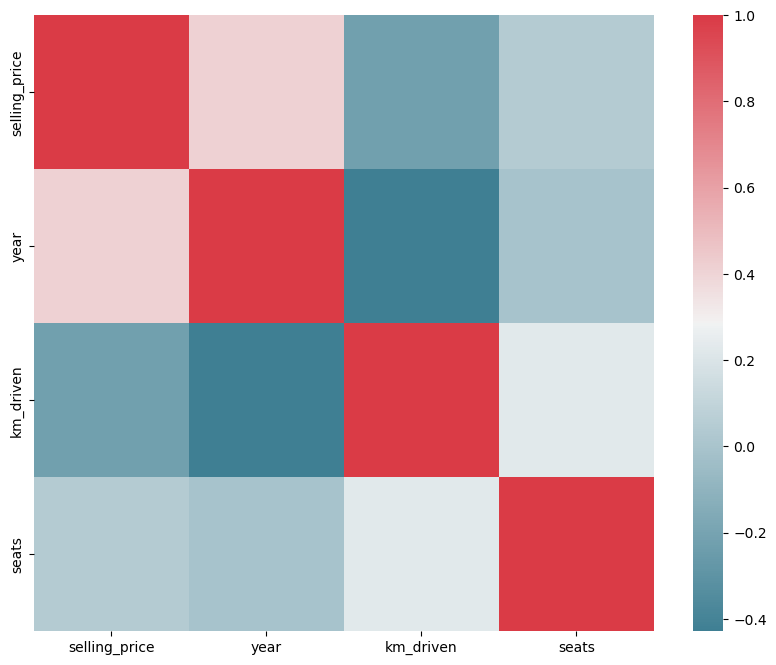

In [146]:
plt.figure(figsize=(10,8)) 

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(reg_num_pandas.corr(), cmap=cmap)

In [147]:
# Train a Multi-variate Linear Regression Model on the Training DataFrame
multi_reg = LinearRegression(featuresCol = 'features', labelCol = 'selling_price',
                                       regParam=0.3, elasticNetParam=0.3)
multi_reg_model = multi_reg.fit(train_df)

In [148]:
# Output Multi-variate Linear Regression Model Summary Statistics to evaluate the Training Model
print("Model Coefficients: " + str(multi_reg_model.coefficients))
print("Intercept: " + str(multi_reg_model.intercept))
training_summary = multi_reg_model.summary
print("RMSE: %f" % training_summary.rootMeanSquaredError)
print("R-SQUARED: %f" % training_summary.r2)
print("TRAINING DATASET DESCRIPTIVE SUMMARY: ")
train_df.describe().show()
print("TRAINING DATASET RESIDUALS: ")
training_summary.residuals.show()

Model Coefficients: [32701.762666580733,-0.21717589067164073,18075.190761198515,42987.35402851107,723.8646191903247,-52362.0797411672,-121068.87671884113,57471.40420340245,-11034.179899903049,24624.344180447588,114513.60377506644,-3888.8520678407904,670176.6931045002,99473.14393184375,-58628.021328592076,84468.18302457109,86194.86176238209,-62906.593710533874,-213605.11516473498,-33906.86532619236,205541.85598937568,-43377.13554783862,-33335.46450222852,-128764.07387580597,-101330.17586104949,171030.64610573152,-34721.029028461955,-94373.34648741016,-527298.491366417,-60474.738572628805,-56770.7725315217,-104951.13621919413,101795.98989631528,11041.161228455561,-200640.1898936605,89177.34152813331,-187064.09105484,53660.85601520079,107372.01619922626,-89566.6662943204,17732.65632978553,76187.83788454431,-164864.8762799824,46096.68592432542,-318099.2632024314,178581.0669987866,10546.539224623953,-149417.7464068727,-8546.734897467215,-57771.95643222545,26750.96982154021,30781.51713295062

+-------+-----------------+
|summary|    selling_price|
+-------+-----------------+
|  count|             5556|
|   mean|646392.2010439165|
| stddev|816805.6165421646|
|    min|            30000|
|    max|         10000000|
+-------+-----------------+

TRAINING DATASET RESIDUALS: 
+-------------------+
|          residuals|
+-------------------+
|  73244.06416709721|
|-14658.439646415412|
|  41851.88255918026|
|-22794.554094344378|
|  7874.821709707379|
|  27874.82170970738|
|-25580.541297502816|
| -36872.22143688798|
| -26872.22143688798|
|-35437.869655542076|
| -37528.70362345129|
|-15528.703623451293|
|-11882.130465991795|
| -5154.632369719446|
|-10230.466290034354|
| 11941.292616680264|
|-15886.948476605117|
| 14113.051523394883|
| 113967.62109922618|
| 63889.967497982085|
+-------------------+
only showing top 20 rows



In [150]:
# Apply the Trained Linear Regression Model to the Test DataFrame to make predictions
test_multi_reg_predictions_df = multi_reg_model.transform(test_df)
print("TEST DATASET PREDICTIONS AGAINST ACTUAL TARGET VALUES: ")
test_multi_reg_predictions_df.select("features", "selling_price","prediction").show(50)

TEST DATASET PREDICTIONS AGAINST ACTUAL TARGET VALUES: 
+--------------------+-------------+------------------+
|            features|selling_price|        prediction|
+--------------------+-------------+------------------+
|(1283,[0,1,2,397,...|       250000| 223880.4335477054|
|(1283,[0,1,2,397,...|       114999|118311.66423672438|
|(1283,[0,1,2,397,...|       150000|159700.46253017336|
|(1283,[0,1,2,397,...|       180000|153185.18581002206|
|(1283,[0,1,2,397,...|       150000|190230.46629003435|
|(1283,[0,1,2,397,...|       105000|112296.51844844967|
|(1283,[0,1,2,397,...|       114999|153685.31674189866|
|(1283,[0,1,2,397,...|        90000|55662.816277474165|
|(1283,[0,1,2,397,...|       125000|118894.58270391822|
|(1283,[0,1,2,399,...|       135000|119163.26290491968|
|(1283,[0,1,2,399,...|       200000|256029.52092098445|
|(1283,[0,1,2,399,...|       220000| 287645.4041342065|
|(1283,[0,1,2,399,...|       270000| 287645.4041342065|
|(1283,[0,1,2,399,...|       195000| 270271.3328

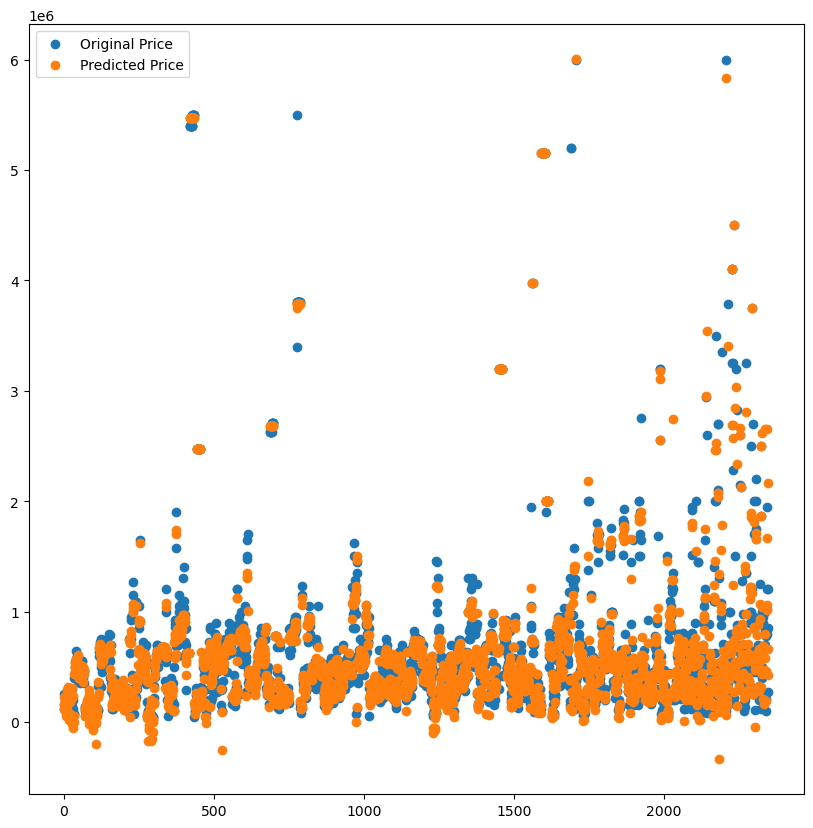

In [154]:
# Plotting the predicted value by linear regression against the original value
import matplotlib.pyplot as plt
graph_res = test_multi_reg_predictions_df.select('selling_price', 'prediction').toPandas()
x13 = graph_res["selling_price"]
x14 = graph_res["prediction"]
plt.figure(figsize=(10,10))
plt.scatter(np.arange(0,len(x13),1),x13,label='Original Price')
plt.scatter(np.arange(0,len(x14),1),x14, label="Predicted Price")
plt.legend(loc="upper left")

In [156]:
# Model Evaluation
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator()
evaluator.setPredictionCol("prediction")
evaluator.setLabelCol('selling_price')

#regression

#Multi-variate Linear Regression
r2_multi_linear = evaluator.evaluate(test_multi_reg_predictions_df,{evaluator.metricName: "r2"})
rmse_multi_linear = evaluator.evaluate(test_multi_reg_predictions_df,{evaluator.metricName: "rmse"})

print(f"R2 for multi-variate linear regression is {r2_multi_linear}")
print(f"RMSE for multi-variate linear regression is {rmse_multi_linear}")


R2 for multi-variate linear regression is 0.9393243780324335
RMSE for multi-variate linear regression is 198501.71000376903


In [158]:
# Stops Spark session
spark.stop()